In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
from fastai.data.load import DataLoader

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from fastai.tabular.all import *

In [6]:
train_df['Cabin'].str[0].map(dict(A="ABC", B="ABC", C="ABC", D="DE", E= "DE", F="FG", G= "FG"))

0      NaN
1      ABC
2      NaN
3      ABC
4      NaN
      ... 
886    NaN
887    ABC
888    NaN
889    ABC
890    NaN
Name: Cabin, Length: 891, dtype: object

In [7]:
train_df.groupby('Ticket')['Ticket'].transform('count').value_counts()

1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: Ticket, dtype: int64

In [8]:
train_df.Name.str.split(', ', expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [9]:
train_df.Name.str.split?

In [10]:
x = train_df.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    
x.map(dict(Mr="Mr", Miss="Miss",Mrs="Mrs",Master= "Master")).value_counts(dropna=False)

Mr        517
Miss      182
Mrs       125
Master     40
NaN        27
Name: 0, dtype: int64

In [11]:
def add_features(df):
    df['Fare'] = np.log(df['Fare']+1)
    
    # We transform the cabin to the deck so that there is meaningful distinction between passengers
    df['Deck'] = df['Cabin'].str[0].map(dict(A="ABC", B="ABC", C="ABC", D="DE", E= "DE", F="FG", G= "FG"))
    
    # Number of family members
    df['Family'] = df.SibSp+df.Parch
    
    df['Alone'] = df.Family==1
    
    # Count of type of tickets, maybe some particular type of tickets survived more
    df['TicketFreq'] = df.groupby('Ticket')['Ticket'].transform('count')
    
    # We just keep the title, first we split the name from sirname and later we split name from title.
    df['Title'] = df.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    
    # Mapping to a dict
    df['Title'] = df. Title.map(dict(Mr="Mr", Miss="Miss",Mrs="Mrs",Master= "Master"))
add_features(train_df)

In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family,Alone,TicketFreq,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S,NaN,1,True,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,4.280593,C85,C,ABC,1,True,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,NaN,0,False,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,ABC,1,True,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S,NaN,0,False,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.639057,NaN,S,NaN,0,False,1,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.433987,B42,S,ABC,0,False,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.196630,NaN,S,NaN,3,False,2,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.433987,C148,C,ABC,0,False,1,Mr


In [13]:
splits = RandomSplitter(seed=42)(train_df)

In [14]:
splits

((#713) [788,525,821,253,374,98,215,313,281,305...],
 (#178) [303,778,531,385,134,476,691,443,386,128...])

In [15]:
dls = TabularPandas(
    train_df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names = ['Title', 'Deck', 'Sex', 'Embarked', 'Pclass'],
    cont_names = ['Age', 'SibSp', 'Parch', 'Fare', 'Alone', 'TicketFreq', 'Family'],
    y_names='Survived', y_block = CategoryBlock(),
).dataloaders(path='.')

In [16]:
learner = tabular_learner(dls, metrics=accuracy, layers=[20, 10])

SuggestedLRs(slide=0.10000000149011612, valley=0.007585775572806597)

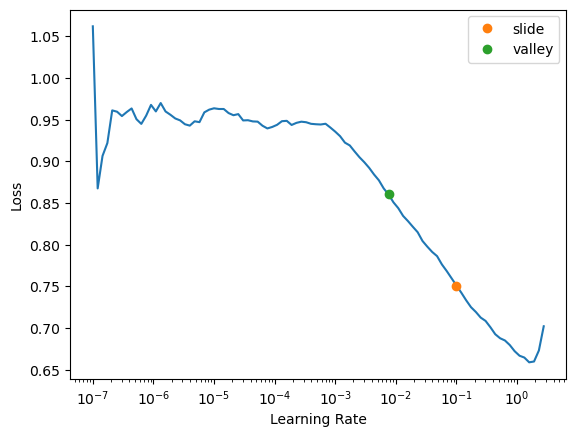

In [17]:
learner.lr_find(suggest_funcs=(slide, valley))

In [18]:
learner2 = tabular_learner(dls, metrics=accuracy, layers=[30, 10])

SuggestedLRs(slide=0.14454397559165955, valley=0.010964781977236271)

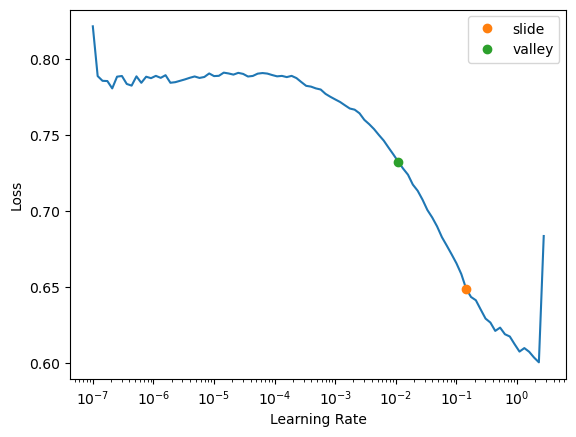

In [19]:
learner2.lr_find(suggest_funcs=(slide, valley))

In [20]:
learner2.lr_find?

In [21]:
learner2.fit(19, lr=0.07)

epoch,train_loss,valid_loss,accuracy,time
0,0.569846,0.963805,0.713483,00:00
1,0.506753,0.586503,0.831461,00:00
2,0.485557,0.448718,0.780899,00:00
3,0.464377,0.417381,0.825843,00:00
4,0.443274,0.434572,0.831461,00:00
5,0.429755,0.425151,0.825843,00:00
6,0.418274,0.418768,0.814607,00:00
7,0.406999,0.413751,0.831461,00:00
8,0.400406,0.426343,0.814607,00:00
9,0.396003,0.436976,0.808989,00:00


In [22]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [23]:
test_df['Fare'] = test_df.Fare.fillna(0)

In [24]:
add_features(test_df)

In [25]:
test_dls = learner2.dls.test_dl(test_df)

In [26]:
preds,_ = learner2.get_preds(dl=test_dls)

In [27]:
test_df['Survived'] = (preds[:,1]>0.5).int()
sub_df = test_df[['PassengerId','Survived']]
sub_df.to_csv('submission.csv', index=False)

In [28]:
!head submission.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
